# GENERATE NEW EVENTS DB FILE

In [180]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
os.listdir('data')

['2022-02-27_eventsDB.csv',
 '2022-03-04_eventsDB.csv',
 'adds1548_1554.csv',
 'celebrity_deaths_4.csv',
 'df_main.csv',
 'economists_lifetimes.csv',
 'eventsDB.js',
 'eventsDB.test',
 'eventsDB_.js',
 'events_db.csv',
 'events_master.csv',
 'list_of_presidents_of_france-836j.csv',
 'list_of_prime_ministers_of_uk-839j.csv',
 'pantheon.tsv',
 'philosophers.csv',
 'README.md',
 'US_Presidents.json',
 'world_events.js',
 'world_events.json',
 'world_events.txt']

In [190]:
master_file = 'data/events_master.csv'
df = pd.read_csv(master_file, encoding = "ISO-8859-1")

In [191]:
df['Event'] = df['Event'].str.strip()
df = df.drop(['Alternatives'], axis=1)

In [192]:
print(df.shape, df.columns)

(155, 21) Index(['EventID', 'Date', 'Event', 'Details', 'ItemDifficulty', 'Categories',
       'America', 'Europe', 'Asia', 'Africa', 'England', 'France', 'Russian',
       'Roman', 'Greek', 'Indian', 'Chinese', 'Science', 'Discovery',
       'Invention', 'Wars'],
      dtype='object')


In [193]:
df.sample(3)

,EventID,Date,Event,Details,ItemDifficulty,Categories,America,Europe,Asia,Africa,...,France,Russian,Roman,Greek,Indian,Chinese,Science,Discovery,Invention,Wars
56,57,1564,William Shakespeare is born: his plays make fundamental statements about the human condition,NaN,4,"[Britain, Literature, ]",NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,c.551 BC,"Birth of Confucius, the founder of one of the world's major philosophical systems",NaN,7,"[prehistory,]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,50,1492,Discovery of America by Columbus.,NaN,1,"[America, ]",1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
df.select_dtypes('object')


,Date,Event,Details,Categories
0,c.3500 BC,Invention of the wheel and plough in Mesopotamia (present-day Iraq); invention of the sail in Egypt: three fundament...,NaN,"[prehistory,]"
1,c.3200 BC,Invention of writing in Mesopotamia: the means to record and understand human history,NaN,"[prehistory,]"
2,c.3000 BC,Founding of the first cities in Sumeria (present-day Iraq): origin of modern social and administrative structures,NaN,"[prehistory,]"
3,c.3000 BC,Building of the Great Pyramid.,NaN,"[prehistory,]"
4,c.1600 BC,Modern alphabet invented: the essential means of communication of complex concepts and culture,NaN,"[prehistory,]"
...,...,...,...,...
150,1995,WTO comes into existence. Nuclear test by France. Balkan peace accord signed.,NaN,NaN
151,1996,Kofi Annan new UN Secretary General. Clinton re-elected US President. India refuses to sign CTBT. Shekh Hasina Wajed...,NaN,"[World, India,"
152,1997,Tony Blair back in power in UK. Mohd. Khatami elected president of Iran. Hong Kong goes back to China after 99 year ...,NaN,NaN
153,1998,Indonesian President Suharto resigns. Pakistan test fires `Gauri' missile. US President Clinton faces impeachment.,NaN,NaN


In [195]:
df.describe()

,EventID,ItemDifficulty,America,Europe,Asia,Africa,England,France,Russian,Roman,Greek,Indian,Chinese,Science,Discovery,Invention,Wars
count,155.000000,155.000000,20.0,65.0,23.0,6.0,24.0,8.0,10.0,1.0,0.0,9.0,11.0,3.0,4.0,1.0,3.0
mean,78.000000,5.658065,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0
std,44.888751,2.071572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0
min,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0
25%,39.500000,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0
50%,78.000000,6.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0
75%,116.500000,7.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0
max,155.000000,9.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0


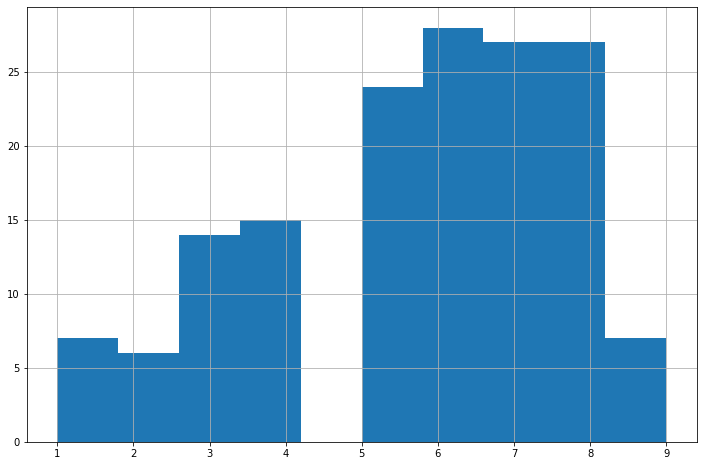

In [196]:
#fig, ax = plt.subplot(figsize=(10,10))
plt.figure(figsize=(12,8))
df['ItemDifficulty'].hist()

In [197]:
diffcat  = pd.cut(df['ItemDifficulty'], bins=3, labels=['E',"M", 'H'])
df['DiffCat'] = diffcat

In [198]:
diffcat.value_counts()

M    67
H    61
E    27
Name: ItemDifficulty, dtype: int64

# Add 3 new columns
- AltsEasy
- AltsMed
- AltsHard

In [207]:
def get_valid_alts(baseyr, perturbs):
    """
    returns a list of valid distractors
    
    baseyr is the correct year. 
    @perturbs is a list of numbers to be added or subtracted
    """    
    options = [baseyr + p for p in perturbs] + [baseyr + (-1*p) for p in perturbs]
    return [dte for dte in options if (dte>0 and dte<2000)]


def get_valid_BC_alts(baseyr, perturbs):
    """
    returns a list of valid distractors
    
    baseyr is the correct year. 
    @perturbs is a list of numbers to be added or subtracted
    """    
    perturbs = [1,2,5]
    options = [baseyr + p for p in perturbs] + [baseyr + (-1*p) for p in perturbs]
    return [dte for dte in options if (dte>0 and dte<2000)]

    
    
diff_perturbs = [100,50, 20,10, 5, 2, 1]
med_perturbs = [100, 20,10, 5]
easy_perturbs = [200, 100,50,20]

perturbationDict = {'Hard': diff_perturbs, 'Medium': med_perturbs, 'Easy': easy_perturbs}

In [208]:
def get_alternatives(_str, difflevel='Hard'):
    
    
    nums = [int(s) for s in _str.split() if s.isdigit()]
    numstr = [s for s in _str.split() if s.isdigit()]
    
    options = None
    perturbs = perturbationDict[difflevel]

    if "BC" in _str:
        if "c." in _str: #circa BC, so give only approx alternatives.
            _str = _str.replace('c.','')
            _str = _str.replace('BC', '')
            nums = [int(s) for s in _str.split() if s.isdigit()]
            numstr = [s for s in _str.split() if s.isdigit()]
            if len(nums)==1:
                nstr = numstr[0]
                if nstr[-3:] == '000':
                    part = int(nstr[:-3])
                    options = get_valid_BC_alts(part, perturbs)
                    return [f' c. {x}000 BC' for x in options if x>0]

                if nstr[-2:] == '00':
                    part = int(nstr[:-2])
                    options = get_valid_BC_alts(part, perturbs)
                    return [f' c. {x}00 BC' for x in options if x >0]                
                
                if nstr[-1] == '0':
                    part = int(nstr[:-1])
                    options = get_valid_BC_alts(part, perturbs)
                    return [f' c. {x}0 BC' for x in options if x >0]                            
                else:
                    numpart = int(nstr)
                    options = get_valid_BC_alts(numpart, perturbs)
                    return [f' c. {x} BC' for x in options if x >0]                            
                    
            
        #case where there is BC but not circa
        #Exact BC year is presumed known
        elif len(nums)==1:
            part = int(nums[0])
            options = get_valid_alts(part, perturbs)
            return [f'{x} BC' for x in options if x>0]        
        
        else: #something not right
            print(f'something not right for {_str}')
            return _str
    
    
    elif 'c.AD' in _str:
        if len(nums)==1:
            a = nums[0]
            options = get_valid_alts(a, perturbs)
            return [f'c. {x} AD' for x in options]
        else:
            print(f'Error in {_str} {nums}')
        
    else: #AD single number event
        nums = [int(s) for s in _str.split() if s.isdigit()]
        if len(nums)==1:
            numpart = nums[0]
            options = get_valid_alts(numpart, perturbs)            
                
        return options

In [209]:
altuples = [('AltsMid', 'Medium'), ('AltsHard', 'Hard'), ('AltsEasy', 'Easy') ]

for a in altuples:
    col, lvl = a
    print(col, lvl)
    df[col] = df['Date'].apply(get_alternatives, difflevel=lvl)
    print(f'{df[col].isnull().sum()} missing')
    fewest_options = df[col].apply(len).min()
    print(f' fewest options are {fewest_options}')
    
print('df now has 3 new columns with Alternatives')

AltsMid Medium
0 missing
 fewest options are 4
AltsHard Hard
0 missing
 fewest options are 5
AltsEasy Easy
0 missing
 fewest options are 4
df now has 3 new columns with Alternatives


In [210]:
pd.set_option('display.max_colwidth', 120)
df[['Date', col]].sample(5)

,Date,AltsEasy
125,1961,"[1981, 1761, 1861, 1911, 1941]"
32,711,"[911, 811, 761, 731, 511, 611, 661, 691]"
38,1088,"[1288, 1188, 1138, 1108, 888, 988, 1038, 1068]"
96,1917,"[1967, 1937, 1717, 1817, 1867, 1897]"
87,1893,"[1993, 1943, 1913, 1693, 1793, 1843, 1873]"


In [212]:
# Just for visual inspections
cond = (df[col].apply(len)==fewest_options)
df[cond][col]

137    [1780, 1880, 1930, 1960]
138    [1782, 1882, 1932, 1962]
139    [1783, 1883, 1933, 1963]
140    [1785, 1885, 1935, 1965]
141    [1786, 1886, 1936, 1966]
142    [1787, 1887, 1937, 1967]
143    [1788, 1888, 1938, 1968]
144    [1789, 1889, 1939, 1969]
145    [1789, 1889, 1939, 1969]
146    [1790, 1890, 1940, 1970]
147    [1791, 1891, 1941, 1971]
148    [1793, 1893, 1943, 1973]
149    [1794, 1894, 1944, 1974]
150    [1795, 1895, 1945, 1975]
151    [1796, 1896, 1946, 1976]
152    [1797, 1897, 1947, 1977]
153    [1798, 1898, 1948, 1978]
154    [1799, 1899, 1949, 1979]
Name: AltsEasy, dtype: object

-------
# Save the events DB file

In [213]:
from datetime import date

today = date.today()
print(f"Today's date: {today}")

Today's date: 2022-03-05


In [215]:
csvfilename = f'data/{today}_eventsDB.csv'
df.to_csv(csvfilename, index=False);
print(f'wrote file {csvfilename}')

wrote file data/2022-03-05_eventsDB.csv


In [7]:
if 0:
    row = df.sample(10).index
    new = df.loc[row]['Date'].apply(get_alternatives)
    pd.DataFrame(np.column_stack([df.loc[row]['Date'], new]))

In [216]:
#cut and paste this output to the file called: eventsDB.js
df.T.to_json('data/backup_eventsDB_.js')

In [217]:
bigstring = df.T.to_json()

In [218]:
outJSfile = f'data/eventsDB.js'
with open(outJSfile, "w") as text_file:
    text_file.write('events = ' + bigstring)

In [219]:
df.columns

Index(['EventID', 'Date', 'Event', 'Details', 'ItemDifficulty', 'Categories',
       'America', 'Europe', 'Asia', 'Africa', 'England', 'France', 'Russian',
       'Roman', 'Greek', 'Indian', 'Chinese', 'Science', 'Discovery',
       'Invention', 'Wars', 'DiffCat', 'AltsMid', 'AltsHard', 'AltsEasy'],
      dtype='object')